## 1. Import packages

In [121]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## 2. Load dataset

In [122]:
with open('mod_05_topic_10_various_data.pkl', 'rb') as f:
    data = pickle.load(f)

df = data['concrete']
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength
0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,25.46
1,108.3,162.4,0.0,203.5,0.0,938.2,849.0,29.23
2,116.0,173.0,0.0,192.0,0.0,909.8,891.9,31.02
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,33.19
4,132.0,206.5,160.9,178.9,5.5,866.9,735.6,33.31


## 3. Create Components feature

In [123]:
df['Components'] = (df[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 
                         'Superplasticizer', 'CoarseAggregate', 'FineAggregate']] > 0).sum(axis=1)
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength,Components
0,102.0,153.0,0.0,192.0,0.0,887.0,942.0,25.46,5
1,108.3,162.4,0.0,203.5,0.0,938.2,849.0,29.23,5
2,116.0,173.0,0.0,192.0,0.0,909.8,891.9,31.02,5
3,122.6,183.9,0.0,203.5,0.0,958.2,800.1,33.19,5
4,132.0,206.5,160.9,178.9,5.5,866.9,735.6,33.31,7


## 4. Normalize dataset

In [124]:
features = df[['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 
               'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Components']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## 5. Determine optimal number of clusters

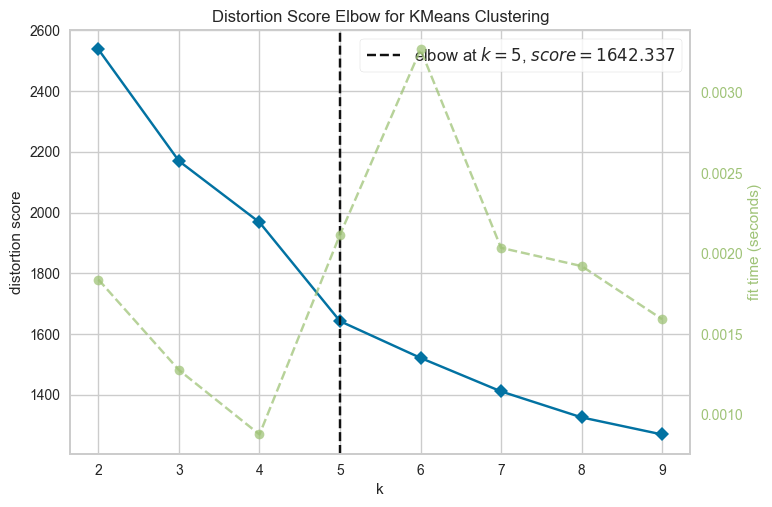

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [125]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(features_scaled)
visualizer.show()

In [126]:
optimal_k = visualizer.elbow_value_
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 5


## 6. Perform k-means clustering

In [127]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

## 7. Calculate cluster statistics

In [128]:
cluster_report = df.groupby('Cluster').agg({
    'Cement': 'median',
    'BlastFurnaceSlag': 'median',
    'FlyAsh': 'median',
    'Water': 'median',
    'Superplasticizer': 'median',
    'CoarseAggregate': 'median',
    'FineAggregate': 'median',
    'CompressiveStrength': 'median',
    'Components': 'median',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'})

cluster_report

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,CompressiveStrength,Components,Count
Cluster,,,,,,,,,,
0,212.3,0.00,125.2,169.95,9.9,1002.0,795.55,39.880,6.0,84
1,186.2,183.40,0.0,190.00,0.0,977.0,734.30,37.430,5.0,85
2,193.0,119.25,116.0,193.55,8.5,879.6,744.10,33.175,7.0,118
3,356.0,121.00,0.0,162.00,10.0,914.3,803.70,59.000,6.0,53
4,342.0,0.00,0.0,186.00,0.0,1040.0,774.00,36.940,4.0,87


## Conclusions

Based on k-means clustering analysis, distinct differences in concrete formulations were identified:

- Different clusters exhibit variations in the number of components and their proportions
- A relationship is observed between concrete composition and its compressive strength
- Clusters with higher cement and additive content show a tendency toward higher strength
- The distribution of formulations across clusters enables identification of typical concrete compositions for different quality levels